In [1]:
import numpy as np
from qiskit.providers.basicaer import QasmSimulatorPy
from bandcalq.bandcalq import BandCalQ
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA

In [ ]:
#All possible parameters
orbitals = 3
t = np.array([[ 0.03   ,  -0.08    ,   0.09 ],
              [ -0.08    ,   0.06    ,   -0.02 ],
              [ 0.09     ,   -0.02    ,   -0.05]])
lattice_parameter = 4
backend = QasmSimulatorPy()
ansatz = EfficientSU2(orbitals, su2_gates=['rx', 'rz', 'ry'], entanglement='full', reps=3)
optimizer = SPSA(maxiter=700)
sites = 1

#Defining problem using BandCalQ class, non-default ansatz and optimizer provided
problem = BandCalQ(orbital_number=orbitals, lattice_constant=lattice_parameter, hopping_matrix=t, backend=backend, interacting_sites=sites, ansatz=ansatz, optimizer=optimizer)

#Computing bands, in this example inside first Brillouin zone
#Theoretical points can be calculated in compute_band_structure method or later in plot_band_structure
problem.compute_band_structure(momentum_min=-np.pi/lattice_parameter, momentum_max=np.pi/lattice_parameter, momentum_points_amount=25, theoretical_points=False)


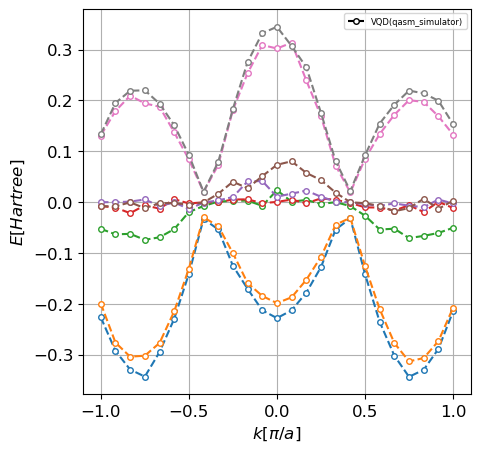

In [7]:
problem.plot_band_structure(theoretical_points=False, save_png=True, png_name="3x3")

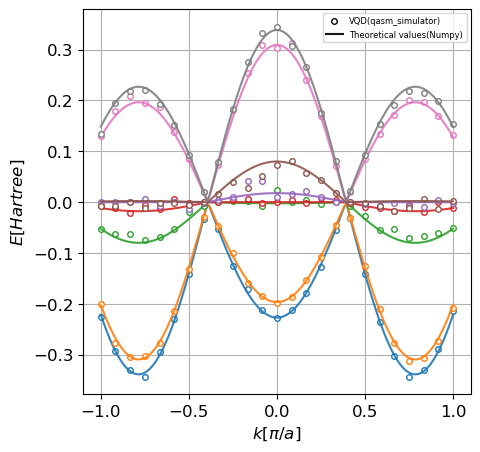

In [8]:
problem.plot_band_structure(theoretical_points=True, save_png=True, png_name="3x3_t")